# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# Had to pip install citipy into my anaconda python 3.7 environment
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# This is ugly, but I'm slicing my city list down into batches
# I'm sure that there is a more efficient way to do this
# I assume that the batch size of 50 is to preven api key from being blocked?

city_slice1 = cities[0:50]
city_slice2 = cities[50:100]
city_slice3 = cities[100:150]
city_slice4 = cities[150:200]
city_slice5 = cities[200:250]
city_slice6 = cities[250:300]
city_slice7 = cities[300:350]
city_slice8 = cities[350:400]
city_slice9 = cities[400:450]
city_slice10 = cities[450:500]
city_slice11 = cities[500:550]
city_slice12 = cities[550:600]
city_slice13 = cities[600:]

city_slices = [city_slice1,
              city_slice1,
              city_slice2,
              city_slice3,
              city_slice4,
              city_slice5,
              city_slice6,
              city_slice7,
              city_slice8,
              city_slice9,
              city_slice10,
              city_slice11,
              city_slice12,
              city_slice13]


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_list = []
cloud_list = []
country_list = []
date_list = []
humid_list = []
lat_list = []
long_list = []
temp_max_list = []
wind_list = []

record_num = 1
set_num = 1


# Loop to iterate through cities
# build query url with current city
# get response and append data to lists



print("Beginning Data Retrieval")
print ("-----------------------------")


for slice in city_slices:
    for c in slice:
        try:
            query_url = url + "appid=" + api_key + "&q=" + c + "&units=imperial"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            print(f"Processing Record {record_num} of set {set_num} | {weather_json['name']}" )
            city_list.append(weather_json['name'])
            cloud_list.append(weather_json['clouds']['all'])
            country_list.append(weather_json['sys']['country'])
            date_list.append(weather_json['dt'])
            humid_list.append(weather_json['main']['humidity'])
            lat_list.append(weather_json['coord']['lat'])
            long_list.append(weather_json['coord']['lon'])
            temp_max_list.append(weather_json['main']['temp_max'])
            wind_list.append(weather_json['wind']['speed'])
        except KeyError:
            print(f"Whoops,  City {c} does not exist, skipping")
        record_num +=1
    set_num +=1
    record_num =1              


Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | Zyryanka
Processing Record 2 of set 1 | Palmares do Sul
Processing Record 3 of set 1 | Mataura
Processing Record 4 of set 1 | Codrington
Processing Record 5 of set 1 | Inirida
Processing Record 6 of set 1 | Garowe
Processing Record 7 of set 1 | Dharmadam
Processing Record 8 of set 1 | Esperance
Processing Record 9 of set 1 | Hermanus
Processing Record 10 of set 1 | Isangel
Processing Record 11 of set 1 | Chokurdakh
Processing Record 12 of set 1 | Severo-Kurilsk
Processing Record 13 of set 1 | Barra
Processing Record 14 of set 1 | Kodiak
Processing Record 15 of set 1 | Rikitea
Processing Record 16 of set 1 | Pinega
Processing Record 17 of set 1 | Saint-Philippe
Whoops,  City bengkulu does not exist, skipping
Processing Record 19 of set 1 | Dikson
Whoops,  City la gaulette does not exist, skipping
Processing Record 21 of set 1 | Busselton
Processing Record 22 of set 1 | Laguna
Processing Record 23 of se

Processing Record 46 of set 4 | Dong Hoi
Processing Record 47 of set 4 | Terrace
Whoops,  City saleaula does not exist, skipping
Processing Record 49 of set 4 | Lompoc
Processing Record 50 of set 4 | Faanui
Processing Record 1 of set 5 | Carthage
Processing Record 2 of set 5 | Vestmannaeyjar
Processing Record 3 of set 5 | Mazagao
Processing Record 4 of set 5 | Atasu
Processing Record 5 of set 5 | Najran
Processing Record 6 of set 5 | Fairbanks
Processing Record 7 of set 5 | Dryden
Processing Record 8 of set 5 | Troitsko-Pechorsk
Processing Record 9 of set 5 | Veraval
Processing Record 10 of set 5 | Hualmay
Processing Record 11 of set 5 | Egvekinot
Processing Record 12 of set 5 | Salo
Whoops,  City grand river south east does not exist, skipping
Whoops,  City yialos does not exist, skipping
Processing Record 15 of set 5 | Teknaf
Processing Record 16 of set 5 | Nicoya
Whoops,  City amderma does not exist, skipping
Processing Record 18 of set 5 | Atuona
Processing Record 19 of set 5 | Cor

Processing Record 42 of set 8 | Kurilsk
Processing Record 43 of set 8 | Comodoro Rivadavia
Whoops,  City artyk does not exist, skipping
Processing Record 45 of set 8 | San Cristobal
Processing Record 46 of set 8 | Villa Carlos Paz
Processing Record 47 of set 8 | Tual
Processing Record 48 of set 8 | Bria
Processing Record 49 of set 8 | Arona
Processing Record 50 of set 8 | Goure
Processing Record 1 of set 9 | Pasco
Processing Record 2 of set 9 | Helena
Processing Record 3 of set 9 | Mount Pleasant
Processing Record 4 of set 9 | Beaverlodge
Processing Record 5 of set 9 | Talalayivka
Processing Record 6 of set 9 | Bull Savanna
Processing Record 7 of set 9 | Tigil
Processing Record 8 of set 9 | Traralgon
Whoops,  City sentyabrskiy does not exist, skipping
Whoops,  City sataua does not exist, skipping
Processing Record 11 of set 9 | Ryotsu
Whoops,  City uwayl does not exist, skipping
Processing Record 13 of set 9 | Los Llanos de Aridane
Processing Record 14 of set 9 | Atambua
Processing Rec

Whoops,  City karauzyak does not exist, skipping
Processing Record 38 of set 12 | Mandera
Processing Record 39 of set 12 | Bani Walid
Processing Record 40 of set 12 | Yar-Sale
Processing Record 41 of set 12 | Mayo
Processing Record 42 of set 12 | Santa Cruz Cabralia
Processing Record 43 of set 12 | Wilmington
Processing Record 44 of set 12 | Lulea
Processing Record 45 of set 12 | Buguruslan
Processing Record 46 of set 12 | Sao Joao da Barra
Processing Record 47 of set 12 | Yaroslavskiy
Processing Record 48 of set 12 | Voh
Processing Record 49 of set 12 | Kawalu
Processing Record 50 of set 12 | Tazovskiy
Whoops,  City stekolnyy does not exist, skipping
Processing Record 2 of set 13 | Eureka
Processing Record 3 of set 13 | Hofn
Processing Record 4 of set 13 | Samarai
Processing Record 5 of set 13 | Matagami
Processing Record 6 of set 13 | San Jose de Guanipa
Processing Record 7 of set 13 | Petropavlovsk-Kamchatskiy
Processing Record 8 of set 13 | Kupang
Processing Record 9 of set 13 | Le

In [5]:
weather_dict = {
    "City": city_list,
    "Cloudiness": cloud_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humid_list,
    "Lat": lat_list,
    "Lng": long_list,
    "Max Temp": temp_max_list,
    "Wind Speed": wind_list
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Zyryanka,100,RU,1576051676,98,65.73,150.89,-19.43,7.07
1,Palmares do Sul,1,BR,1576051676,94,-30.26,-50.51,57.00,7.72
2,Mataura,73,NZ,1576051512,81,-46.19,168.86,55.99,3.00
3,Codrington,100,AU,1576051547,62,-28.95,153.24,84.20,5.82
4,Inirida,100,CO,1576051569,98,3.87,-67.92,71.80,1.77


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000
mean,59.065744,1.576052e+09,73.754325,18.506401,20.469135,52.010900,8.235709
std,39.221707,1.041523e+02,21.356718,34.566849,92.859689,29.812414,6.291041
min,0.000000,1.576051e+09,1.000000,-54.810000,-179.170000,-34.310000,0.200000
25%,18.000000,1.576052e+09,65.000000,-11.445000,-65.322500,31.052500,3.670000
50%,75.000000,1.576052e+09,79.000000,21.315000,22.245000,61.205000,6.930000
75%,97.000000,1.576052e+09,91.000000,47.772500,107.827500,75.200000,10.880000
max,100.000000,1.576052e+09,100.000000,78.220000,179.320000,105.800000,38.030000


In [7]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Zyryanka,100,RU,1576051676,98,65.73,150.89,-19.43,7.07
1,Palmares do Sul,1,BR,1576051676,94,-30.26,-50.51,57.00,7.72
2,Mataura,73,NZ,1576051512,81,-46.19,168.86,55.99,3.00
3,Codrington,100,AU,1576051547,62,-28.95,153.24,84.20,5.82
4,Inirida,100,CO,1576051569,98,3.87,-67.92,71.80,1.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

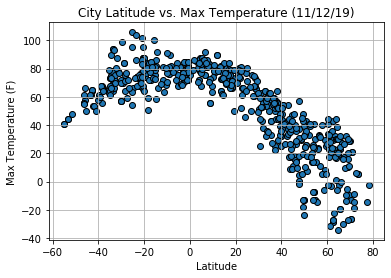

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")

plot_date = time.strftime('%d/%m/%y')
title_txt = f"City Latitude vs. Max Temperature ({plot_date})"
plt.title(title_txt)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

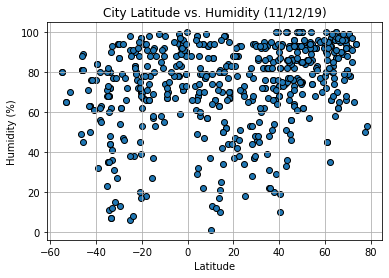

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

plot_date = time.strftime('%d/%m/%y')
title_txt = f"City Latitude vs. Humidity ({plot_date})"
plt.title(title_txt)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

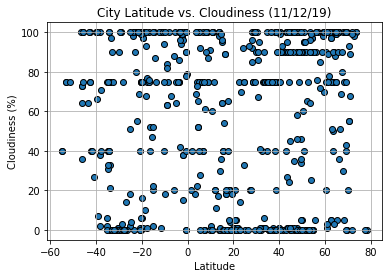

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")

plot_date = time.strftime('%d/%m/%y')
title_txt = f"City Latitude vs. Cloudiness ({plot_date})"
plt.title(title_txt)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

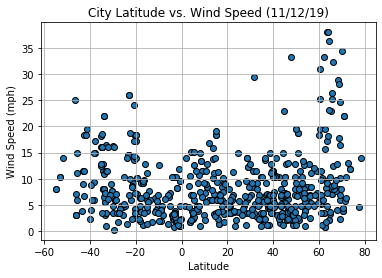

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")

plot_date = time.strftime('%d/%m/%y')
title_txt = f"City Latitude vs. Wind Speed ({plot_date})"
plt.title(title_txt)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)